In [ ]:
# Multi Linear Regression
# Dataset Brain stroke

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/brain_stroke.csv')
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


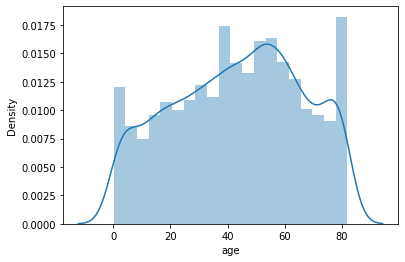

In [4]:
#Visualization
sns.distplot(df['age']) #distribution plot for maximum people having stroke at which age!

In [5]:
#We want to consider only the numeric data
#So we will create a new dataframe with only numeric data
df_numeric = df.select_dtypes(include = ['float64','int64'])
df_numeric

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,67.0,0,1,228.69,36.6,1
1,80.0,0,1,105.92,32.5,1
2,49.0,0,0,171.23,34.4,1
3,79.0,1,0,174.12,24.0,1
4,81.0,0,0,186.21,29.0,1
...,...,...,...,...,...,...
4976,41.0,0,0,70.15,29.8,0
4977,40.0,0,0,191.15,31.1,0
4978,45.0,1,0,95.02,31.8,0
4979,40.0,0,0,83.94,30.0,0


In [6]:
#I want to know the exact count of How many have got stroke and not got stroke.
#0 - No Stroke
#1 - Stroke
df['stroke'].value_counts()

0    4733
1     248
Name: stroke, dtype: int64

In [7]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                4981 non-null   float64
 1   hypertension       4981 non-null   int64  
 2   heart_disease      4981 non-null   int64  
 3   avg_glucose_level  4981 non-null   float64
 4   bmi                4981 non-null   float64
 5   stroke             4981 non-null   int64  
dtypes: float64(3), int64(3)
memory usage: 233.6 KB


In [ ]:
#Divide the data into i/p and o/p
#Output: Age at which most of the people get stroke
#Input: All the columns except age column.

In [8]:
x = df_numeric.iloc[:,1:6].values
x

array([[  0.  ,   1.  , 228.69,  36.6 ,   1.  ],
       [  0.  ,   1.  , 105.92,  32.5 ,   1.  ],
       [  0.  ,   0.  , 171.23,  34.4 ,   1.  ],
       ...,
       [  1.  ,   0.  ,  95.02,  31.8 ,   0.  ],
       [  0.  ,   0.  ,  83.94,  30.  ,   0.  ],
       [  1.  ,   0.  ,  83.75,  29.1 ,   0.  ]])

In [9]:
y = df_numeric.iloc[:,0].values
y

array([67., 80., 49., ..., 45., 40., 80.])

In [10]:
#TRAIN and TEST VARIABLES
#sklearn.model_selection - package , train_test_split - library
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0)

#Whatever data splitting /data allocation happens to the xtrain,x_test,ytrain,ytest variables , we want those allocated values to remain constant
#By default the training variables get 75 % and testing variables get 25%

In [11]:
print(x.shape)  #4981 rows and 5 cols
print(x_train.shape) #3735 rows and 5 cols (75%)
print(x_test.shape) #1246 rows and 5 cols (25%)

(4981, 5)
(3735, 5)
(1246, 5)


In [12]:
print(y.shape) # 4981 rows and 1 col
print(y_train.shape) # 3735 rows and 1 cols(75 %)
print(y_test.shape) #1246 rows and 1 col(25%)

(4981,)
(3735,)
(1246,)


In [13]:
#SCALING or NORMALISATION -DONE ONLY FOR INPUTS
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [14]:
#RUN a CLASSIFIER/REGRESSOR/CLUSTERER
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [15]:
#MODEL FITTING
model.fit(x_train,y_train)

LinearRegression()

In [16]:
#PREDICT THE OUTPUT
y_pred = model.predict(x_test) #By taking the input testing data , we predict the output
y_pred #PREDICTED VALUES

array([45.24391547, 51.49240425, 28.84289821, ..., 35.22385774,
       34.87637116, 28.49874727])

In [17]:
y_test #ACTUAL VALUES

array([40., 78., 14., ..., 80., 18.,  2.])

In [19]:
print(x_train[56]) #these are scaled/normalised values

[0.         0.         0.16600499 0.39255014 0.        ]


In [21]:
#INDIVIDUAL PREDICTION
model.predict([x_train[89]])

array([48.76754935])

In [22]:
# Logistic Regression
# Dataset - 

In [32]:
df1 = pd.read_csv('/content/bmi.csv')
df1

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3
...,...,...,...,...
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5


In [30]:
df.shape

(4981, 11)

In [31]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Index   500 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB


In [ ]:
#Input - Height and Weight
#Output - Index

In [35]:
#I want to know the exact count of male and female
df1['Gender'].value_counts()

Female    255
Male      245
Name: Gender, dtype: int64

In [83]:
#divide the data into i/p and o/p
x1 = df1.iloc[:,1:3].values 
x1

array([[174,  96],
       [189,  87],
       [185, 110],
       [195, 104],
       [149,  61],
       [189, 104],
       [147,  92],
       [154, 111],
       [174,  90],
       [169, 103],
       [195,  81],
       [159,  80],
       [192, 101],
       [155,  51],
       [191,  79],
       [153, 107],
       [157, 110],
       [140, 129],
       [144, 145],
       [172, 139],
       [157, 110],
       [153, 149],
       [169,  97],
       [185, 139],
       [172,  67],
       [151,  64],
       [190,  95],
       [187,  62],
       [163, 159],
       [179, 152],
       [153, 121],
       [178,  52],
       [195,  65],
       [160, 131],
       [157, 153],
       [189, 132],
       [197, 114],
       [144,  80],
       [171, 152],
       [185,  81],
       [175, 120],
       [149, 108],
       [157,  56],
       [161, 118],
       [182, 126],
       [185,  76],
       [188, 122],
       [181, 111],
       [161,  72],
       [140, 152],
       [168, 135],
       [176,  54],
       [163,

In [84]:
y1 = df1.iloc[:,3].values
y1

array([4, 2, 4, 3, 3, 3, 5, 5, 3, 4, 2, 4, 3, 2, 2, 5, 5, 5, 5, 5, 5, 5,
       4, 5, 2, 3, 3, 1, 5, 5, 5, 1, 1, 5, 5, 4, 3, 4, 5, 2, 4, 5, 2, 5,
       4, 2, 4, 4, 3, 5, 5, 1, 5, 4, 4, 3, 4, 5, 3, 5, 0, 5, 0, 2, 5, 5,
       4, 2, 4, 4, 2, 4, 5, 2, 3, 4, 4, 4, 4, 0, 3, 5, 3, 4, 5, 0, 5, 5,
       5, 5, 5, 3, 3, 2, 4, 5, 4, 5, 1, 0, 4, 5, 5, 4, 4, 4, 5, 5, 4, 3,
       4, 5, 4, 2, 4, 3, 2, 5, 5, 5, 4, 4, 4, 5, 5, 4, 4, 4, 5, 2, 5, 2,
       5, 4, 5, 5, 5, 3, 5, 5, 2, 4, 5, 5, 5, 4, 3, 5, 3, 3, 0, 3, 3, 5,
       5, 4, 3, 5, 3, 4, 2, 2, 3, 5, 4, 2, 4, 5, 3, 2, 4, 5, 5, 4, 4, 4,
       4, 3, 5, 3, 3, 4, 4, 2, 3, 3, 5, 3, 5, 4, 5, 5, 4, 5, 5, 5, 4, 4,
       5, 5, 1, 3, 4, 4, 5, 4, 5, 4, 3, 4, 4, 5, 5, 5, 0, 5, 5, 5, 5, 5,
       2, 5, 4, 5, 0, 5, 3, 4, 5, 5, 4, 2, 3, 3, 4, 3, 5, 5, 2, 5, 3, 2,
       1, 5, 0, 5, 3, 5, 3, 4, 3, 5, 5, 5, 5, 2, 4, 5, 5, 4, 5, 5, 5, 2,
       4, 5, 5, 5, 5, 1, 5, 5, 4, 0, 3, 3, 4, 2, 3, 1, 1, 5, 5, 4, 4, 4,
       4, 5, 2, 5, 4, 3, 3, 4, 5, 5, 2, 4, 3, 4, 5,

In [85]:
#Train_test_split/train and test variables
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,random_state = 0)

In [86]:
print(x1.shape)
print(x1_train.shape) #- 75%
print(x1_test.shape) # 25%

(500, 2)
(375, 2)
(125, 2)


In [87]:
print(y1.shape)
print(y1_train.shape) #- 75%
print(y1_test.shape) #- 25%

(500,)
(375,)
(125,)


In [88]:
#NORMALISATION or SCALING
scaler1 = MinMaxScaler()
x1_train = scaler1.fit_transform(x1_train)
x1_test = scaler1.fit_transform(x1_test)

In [89]:
#Apply Classifier,Regressor or Clusterer
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()

In [90]:
#Fitting the model
model1.fit(x1_train,y1_train)

LogisticRegression()

In [91]:
#Predict the output
y1_pred = model1.predict(x1_test)
y1_pred #PREDCITED VALUES

array([5, 5, 5, 5, 5, 5, 4, 5, 4, 5, 2, 2, 2, 5, 5, 4, 5, 4, 5, 5, 5, 4,
       4, 4, 2, 2, 5, 4, 5, 4, 4, 5, 5, 5, 4, 2, 5, 4, 5, 2, 5, 4, 5, 5,
       5, 4, 5, 2, 5, 5, 4, 4, 4, 5, 5, 4, 4, 4, 2, 5, 5, 4, 4, 2, 4, 4,
       2, 4, 5, 5, 5, 5, 2, 4, 4, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 4, 5, 5,
       5, 4, 4, 2, 4, 2, 4, 2, 4, 5, 2, 4, 5, 5, 4, 4, 5, 5, 4, 5, 5, 4,
       4, 5, 4, 4, 5, 5, 5, 4, 5, 5, 2, 5, 5, 5, 5])

In [92]:
y1_test

array([5, 5, 4, 5, 5, 5, 3, 5, 4, 5, 2, 3, 2, 5, 5, 3, 5, 3, 5, 4, 4, 3,
       3, 4, 2, 1, 5, 4, 4, 3, 4, 5, 5, 5, 4, 0, 5, 4, 5, 2, 5, 4, 4, 5,
       4, 2, 5, 2, 5, 5, 4, 4, 3, 5, 5, 3, 4, 4, 0, 4, 4, 4, 4, 1, 4, 4,
       2, 3, 5, 4, 5, 5, 3, 4, 4, 5, 4, 4, 5, 5, 5, 3, 4, 5, 5, 2, 5, 5,
       5, 4, 2, 2, 3, 1, 3, 1, 4, 4, 0, 3, 5, 5, 4, 3, 5, 5, 2, 5, 4, 4,
       4, 5, 3, 3, 5, 5, 5, 4, 4, 5, 2, 5, 5, 5, 5])

In [93]:
#Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y1_pred,y1_test)* 100

64.8